In [1]:
import pandas as pd
import numpy as np
from numpy import *
import os
import pandas as pd
import tqdm
import sys
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.datasets import make_classification
%matplotlib inline

In [2]:
def get_gene_list_bulk(file_name):
    """
    建立基因symbol到ensembl转换的字典
    file_name = './data/bulk_gene_list.txt'
    """
    import re
    h = {}
    s = open(file_name, 'r')  # gene symbol ID list of bulk RNA-seq
    for line in s:
        search_result = re.search(r'^([^\s]+)\s+([^\s]+)', line)
        h[search_result.group(1).lower()] = search_result.group(2)  # h [gene symbol] = gene ID
    s.close()
    return h


def get_gene_list(file_name):
    """
    建立基因symbol到一个id转换的字典
    file_name = './data/sc_gene_list.txt'
    """

    import re
    h = {}
    s = open(file_name, 'r')  # gene symbol ID list of sc RNA-seq
    for line in s:
        search_result = re.search(r'^([^\s]+)\s+([^\s]+)', line)
        h[search_result.group(1).lower()] = search_result.group(2)  # h [gene symbol] = gene ID
    s.close()
    return h

def get_sepration_index(file_name):
    import numpy as np
    index_list = []
    s = open(file_name, 'r')
    for line in s:
        index_list.append(int(line))
    return (np.array(index_list))

In [3]:
###########################
# 建立基因symbol到ensembl转换的字典

# h_gene_list_bulk = get_gene_list_bulk(sys.argv[1])  # 'bulk_gene_list.txt')#
h_gene_list_bulk = get_gene_list_bulk('./data/bulk_gene_list.txt')  # 'bulk_gene_list.txt')#
print('read bulk gene list')

    
# h_gene_list = get_gene_list(sys.argv[2])  # 'sc_gene_list.txt')#
h_gene_list = get_gene_list('./data/sc_gene_list.txt')  # 'sc_gene_list.txt')#
print('read sc gene list')

store = pd.HDFStore('./data/mouse_bulk.h5')
rpkm_bulk = store['rpkm']
store.close()
print('read bulk RNA-seq expression')
rpkm_bulk

read bulk gene list
read sc gene list
read bulk RNA-seq expression


0    ENSMUSG00000000001  ENSMUSG00000000003  ENSMUSG00000000028  \
1                 98.09                 0.0               17.44   
2                 70.62                 0.0                0.93   
3                  9.72                 0.0                1.31   
4                  5.26                 0.0                0.00   
5                 10.16                 0.0                4.11   
..                  ...                 ...                 ...   
245               94.40                 0.0               13.48   
246               29.23                 0.0                0.00   
247               45.10                 0.0               13.86   
248               93.01                 0.0               31.50   
249               64.78                 0.0               40.43   

0    ENSMUSG00000000031  ENSMUSG00000000037  ENSMUSG00000000049  \
1                508.80                2.65                1.10   
2                  1.04                0.97                0.40   
3                  0.89                0.10                0.12   
4                333.47                0.00                0.00   
5                  0.97                0.21                0.00   
..                  ...                 ...                 ...   
245               88.15                1.66                0.09   
246             1127.23                0.00               42.59   
247                0.05                0.00                0.06   
248              244.73                2.74                2.08   
249              237.39                0.97               26.44   

0    ENSMUSG00000000056  ENSMUSG00000000058  ENSMUSG00000000078  \
1                 29.60               17.46               29.87   
2                  6.11              166.12               39.71   
3                 26.96                3.86                5.48   
4                  0.00                0.00                0.00   
5                 16.49               31.01                5.53   
..                  ...                 ...                 ...   
245               41.46                4.13               22.28   
246                7.21                0.00                0.00   
247               62.70                0.00                5.94   
248               25.99               49.54               20.83   
249               87.21                2.33                8.95   

0    ENSMUSG00000000085  ...  ENSMUSG00000104518  ENSMUSG00000104519  \
1                 19.86  ...                 0.0                0.03   
2                 13.42  ...                 0.0                0.10   
3                 25.22  ...                 0.0                0.08   
4                  0.00  ...                 0.0                0.00   
5                 13.69  ...                 0.0                0.07   
..                  ...  ...                 ...                 ...   
245               38.70  ...                 0.0                0.06   
246              146.76  ...                 0.0                0.00   
247               24.11  ...                 0.0                0.00   
248               19.69  ...                 0.0                0.20   
249               15.48  ...                 0.0                0.00   

0    ENSMUSG00000104520  ENSMUSG00000104521  ENSMUSG00000104522  \
1                  0.00                 0.0                 0.0   
2                  0.00                 0.0                 0.0   
3                  0.10                 0.0                 0.0   
4                  0.00                 0.0                 0.0   
5                  0.00                 0.0                 0.0   
..                  ...                 ...                 ...   
245                0.00                 0.0                 0.0   
246                0.00                 0.0                 0.0   
247                0.05                 0.0                 0.0   
248                0.15                 0.0       

In [4]:
store = pd.HDFStore('./data/rank_total_gene_rpkm.h5')  # '/home/yey3/sc_process_1/rank_total_gene_rpkm.h5')    # scRNA-seq expression data                        )#
rpkm = store['rpkm']
store.close()
print('read sc RNA-seq expression')
rpkm = rpkm.loc[:43260]
rpkm.columns = rpkm.columns.astype('str')
rpkm

read sc RNA-seq expression


16334       19241  16333        67945       11461  14526       17105  \
0        0.0    0.000000    0.0     0.000000   21.939291    0.0    0.000000   
1        0.0  245.781931    0.0   290.568861   29.108635    0.0    0.000000   
2        0.0  940.655901    0.0  5083.722556  843.491088    0.0    0.000000   
3        0.0  153.623542    0.0  6538.217927  127.358430    0.0    0.000000   
4        0.0    0.000000    0.0  7472.699173  544.436919    0.0    0.000000   
...      ...         ...    ...          ...         ...    ...         ...   
43256    0.0  483.635100    0.0  1953.455252   57.365161    0.0   76.529130   
43257    0.0  520.529289    0.0  1869.345786   74.499863    0.0  109.678380   
43258    0.0  485.836540    0.0  1907.953931   59.826196    0.0   62.242252   
43259    0.0  448.963478    0.0  1794.582982   67.317900    0.0   65.602208   
43260    0.0  541.218367    0.0  2409.926101   77.916595    0.0   62.022829   

            14325  15874        14319  ...  100039574  100040911  100041256  \
0      314.716730    0.0   135.621049  ...        0.0        0.0        0.0   
1       99.419090    0.0    19.993270  ...        0.0        0.0        0.0   
2      521.823711    0.0   327.935085  ...        0.0        0.0        0.0   
3      298.276365    0.0    37.489782  ...        0.0        0.0        0.0   
4        0.000000    0.0  4580.845615  ...        0.0        0.0        0.0   
...           ...    ...          ...  ...        ...        ...        ...   
43256  255.953014    0.0   188.350009  ...        0.0        0.0        0.0   
43257  272.029656    0.0   211.922435  ...        0.0        0.0        0.0   
43258  249.153084    0.0   208.335141  ...        0.0        0.0        0.0   
43259  258.057114    0.0   197.180124  ...        0.0        0.0        0.0   
43260  322.654197    0.0   234.447714  ...        0.0        0.0        0.0   

       70009  258630  257872  74484  258751  100040786  100042428  
0        0.0     0.0     0.0    0.0     0.0        0.0        0.0  
1        0.0     0.0     0.0    0.0     0.0        0.0        0.0  
2        0.0     0.0     0.0    0.0     0.0        0.0        0.0  
3        0.0     0.0     0.0    0.0     0.0        0.0        0.0  
4        0.0     0.0     0.0    0.0     0.0        0.0        0.0  
...      ...     ...     ...    ...     ...        ...        ...  
43256    0.0     0.0     0.0    0.0     0.0        0.0        0.0  
43257    0.0     0.0     0.0    0.0     0.0        0.0        0.0  
43258    0.0     0.0     0.0    0.0     0.0        0.0        0.0  
43259    0.0     0.0     0.0    0.0     0.0        0.0        0.0  
43260    0.0     0.0     0.0    0.0     0.0        0.0        0.0  

[43261 rows x 20463 columns]

In [5]:
gene_pair_label = []
# s = open(sys.argv[3])  # 'mmukegg_new_new_unique_rand_labelx.txt')#)   ### read the gene pair and label file
s = open('./data/mmukegg_new_new_unique_rand_labelx.txt')
for line in s:
    gene_pair_label.append(line)
# gene_pair_index = get_sepration_index(
#     sys.argv[4])  # 'mmukegg_new_new_unique_rand_labelx_num.npy')#sys.argv[6]) # read file speration index
gene_pair_index = get_sepration_index('./data/mmukegg_new_new_unique_rand_labelx_num.txt')
s.close()
gene_pair_label_array = array(gene_pair_label)
print(len(gene_pair_index)-1)
print(len(gene_pair_label_array)*2/3)

3057
61648.0


In [6]:
genes_corr = {}
genes_non_corr = {}
all_genes = set()

for i in tqdm.tqdm(range(len(gene_pair_index) - 1)):
    start_index = gene_pair_index[i]
    end_index = gene_pair_index[i+1]
    gene = gene_pair_label_array[start_index].split()[0]
    gene_corr = []
    gene_non_corr = []
    for gene_pair in gene_pair_label_array[start_index:end_index]: ## each speration
        separation = gene_pair.split()
        x_gene_name, y_gene_name, label = separation[0],separation[1],separation[2]
        all_genes.add(x_gene_name)
        all_genes.add(y_gene_name)
        if label == '1':
            gene_corr.append([x_gene_name, y_gene_name])
        elif label == '0':
            gene_non_corr.append([x_gene_name, y_gene_name])
    genes_corr[gene] = gene_corr
    genes_non_corr[gene] = gene_non_corr

100%|██████████| 3057/3057 [00:00<00:00, 20036.42it/s]


In [7]:
bulk_genes = {h_gene_list_bulk[i] for i in all_genes}
sc_genes = {h_gene_list[i] for i in all_genes}

bulk_gene_dict = dict(zip(h_gene_list_bulk.values(), h_gene_list_bulk.keys()))
sc_gene_dict = dict(zip(h_gene_list.values(), h_gene_list.keys()))

In [8]:
print(len(bulk_genes), len(sc_genes), len(all_genes))

3707 3707 3707


In [9]:
rpkm_bulk = rpkm_bulk[bulk_genes]
rpkm_bulk.columns = [bulk_gene_dict[i] for i in rpkm_bulk.columns]
rpkm_bulk

fgfr3    rab14  atg10  camk1g  lama1  olfr332   ywhag  olfr1289  trip6  \
1    19.81   135.44   8.10    3.97   0.88     0.00   78.23       0.0  67.52   
2     0.82   102.03  10.61    0.28   0.89     0.25   36.86       0.0   0.10   
3    20.27    77.79   3.23    4.63   0.66     0.00  149.80       0.0   1.83   
4    16.25     1.31   0.00    0.00   0.00     0.00    8.79       0.0   0.00   
5     3.98  2812.09   0.25    0.31   1.94     0.00  165.39       0.0  74.20   
..     ...      ...    ...     ...    ...      ...     ...       ...    ...   
245  32.71   138.01   7.24    9.89   6.05     0.00  199.16       0.0  23.05   
246   0.00    29.79   0.00    0.00   0.00     0.00   22.55       0.0  27.34   
247   6.68    61.24   1.04    0.05   0.00     0.02   37.74       0.0   0.31   
248  33.14   123.47   7.76   20.72   1.37     0.02   69.54       0.0  61.44   
249   3.31    74.50   3.34    0.67   0.87     0.00   73.80       0.0  14.93   

     pabpc2  ...   vegfa   pdk1  olfr1093  ccr7  olfr985  lpar2  olfr1387  \
1      0.00  ...    2.75  37.93       0.0  0.20      0.0   0.24       0.0   
2      7.08  ...   28.65  43.39       0.0  0.03      0.0   0.62       0.0   
3      0.03  ...   43.15   5.90       0.0  0.00      0.0   0.14       0.0   
4      0.00  ...    0.00   6.07       0.0  0.00      0.0   0.00       0.0   
5      0.00  ...  440.13  37.61       0.0  0.36      0.0   1.43       0.0   
..      ...  ...     ...    ...       ...   ...      ...    ...       ...   
245    0.00  ...    1.98  13.87       0.0  0.12      0.0   0.34       0.0   
246    0.00  ...   19.63   0.00       0.0  0.00      0.0   0.00       0.0   
247    0.00  ...   83.54  58.70       0.0  0.36      0.0   0.23       0.0   
248    0.01  ...    3.47  26.94       0.0  0.07      0.0   0.32       0.0   
249    0.00  ...    2.12  49.80       0.0  0.29      0.0   0.15       0.0   

     olfr635  tnfsf13  map3k1  
1        0.0     0.39    7.79  
2        0.0     3.90   12.69  
3        0.0     2.11    6.33  
4        0.0     0.00    0.82  
5        0.0     1.76    6.30  
..       ...      ...     ...  
245      0.0     0.24    7.00  
246      0.0     0.00    0.00  
247      0.0     0.09    9.48  
248      0.0     0.62   15.51  
249      0.0     0.16   12.25  

[249 rows x 3707 columns]

In [12]:
rpkm = rpkm[sc_genes]
rpkm.columns = [sc_gene_dict[i] for i in rpkm.columns]
rpkm

aph1b        cfl1      vamp3        il2      rab5c     ednra  \
0      0.000000    0.000000   0.000000   0.000000   0.000000  0.000000   
1      0.000000   65.772630   0.000000   0.000000   0.000000  0.000000   
2      0.000000  407.554468   0.000000  11.773690   0.000000  0.000000   
3      0.000000  534.436828   0.000000   0.000000   0.000000  0.000000   
4      0.000000    0.000000   0.000000   0.000000   0.000000  0.000000   
...         ...         ...        ...        ...        ...       ...   
43256  0.932018   64.351683  25.011308   1.414604  26.168157  0.356697   
43257  1.554968   69.957223  28.785658   0.539454  25.200390  0.374069   
43258  1.087962   62.640168  20.261379   1.406658  22.767771  0.581610   
43259  1.257306   61.545406  25.669812   0.923382  21.448135  0.975685   
43260  1.180877   77.451570  26.696446   0.995733  29.318731  0.631280   

        gm13306       bin1  olfr584       irs3  ...        ctsc      dnajc3  \
0      0.000000   0.000000      0.0   0.000000  ...    0.000000    0.000000   
1      0.000000   0.000000      0.0   0.000000  ...    0.000000    0.000000   
2      0.000000   0.000000      0.0  12.027229  ...    0.000000   11.891192   
3      0.000000   0.000000      0.0   0.000000  ...    0.000000    0.000000   
4      0.000000   0.000000      0.0   0.000000  ...    0.000000    0.000000   
...         ...        ...      ...        ...  ...         ...         ...   
43256  4.670995  17.127777      0.0   0.437899  ...   89.672106   97.694280   
43257  2.955980  18.490928      0.0   0.436264  ...   82.970951   99.773375   
43258  5.055614  14.241053      0.0   0.354031  ...  100.311898   91.995272   
43259  4.394749  17.429248      0.0   0.586921  ...  119.960651   80.866533   
43260  4.905380  19.126300      0.0   0.949363  ...   99.866964  103.047661   

            mdm2  olfr507       klc4    hspa1a         fth1     hif1a  cnga4  \
0       0.000000      0.0   0.000000  0.000000   135.621049  0.000000    0.0   
1       0.000000      0.0   0.000000  0.000000    19.993270  0.000000    0.0   
2      58.940134      0.0   0.000000  0.000000   327.935085  9.851157    0.0   
3       0.000000      0.0  11.074217  0.000000    37.489782  0.000000    0.0   
4       0.000000      0.0   0.000000  0.000000  4580.845615  0.000000    0.0   
...          ...      ...        ...       ...          ...       ...    ...   
43256   7.155916      0.0   6.454275  1.943703   188.350009  5.259006    0.0   
43257   9.763539      0.0   6.398740  2.658736   211.922435  5.486918    0.0   
43258   7.442229      0.0   5.082268  1.495077   208.335141  5.309132    0.0   
43259   7.206407      0.0   5.402492  1.521030   197.180124  5.498352    0.0   
43260   7.464307      0.0   7.773802  2.268374   234.447714  4.693349    0.0   

          gria2  
0      0.000000  
1      0.000000  
2      0.000000  
3      0.000000  
4      0.000000  
...         ...  
43256  0.024676  
43257  0.025878  
43258  0.011735  
43259  0.000000  
43260  0.000000  

[43261 rows x 3707 columns]

In [98]:
for gene in tqdm.tqdm(genes_corr):
    gene_corr = genes_corr[gene]
   
    for i in range(len(gene_corr)):
        x_gene, y_gene = gene_corr[i]
        x = rpkm[x_gene]
        y = rpkm[y_gene]
        corr = x.corr(y, 'spearman')
        
        bulk_x = rpkm_bulk[x_gene]
        bulk_y = rpkm_bulk[y_gene]
        bulk_corr = bulk_x.corr(bulk_y, 'spearman')
        
        genes_corr[gene][i].extend([corr, bulk_corr])
        
    
    gene_non_corr = genes_non_corr[gene]
       
    for i in range(len(gene_non_corr)):
        x_gene, y_gene = gene_non_corr[i]
        x = rpkm[x_gene]
        y = rpkm[y_gene]
        corr = x.corr(y, 'spearman')
        
        bulk_x = rpkm_bulk[x_gene]
        bulk_y = rpkm_bulk[y_gene]
        bulk_corr = bulk_x.corr(bulk_y, 'spearman')
        
        genes_non_corr[gene][i].extend([corr, bulk_corr])

100%|██████████| 3055/3055 [05:48<00:00,  8.77it/s]


In [108]:
corr_scores = [i[2] for gene in genes_corr for i in genes_corr[gene]]
non_corr_scores = [i[2] for gene in genes_non_corr for i in genes_non_corr[gene]]

In [110]:
all_socres = corr_scores + non_corr_scores
all_labels = ([1] * len(corr_scores)) + ([0] * len(non_corr_scores))

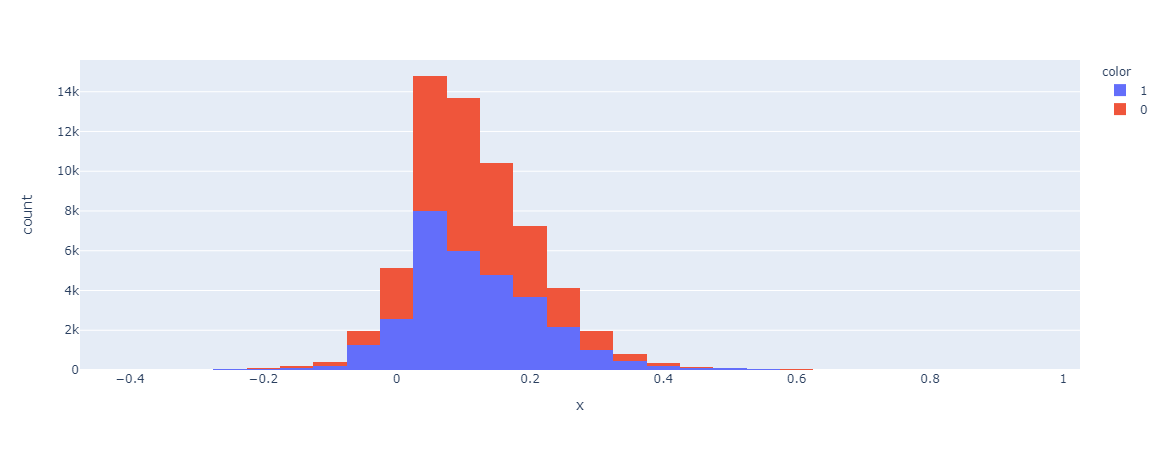

In [111]:
fig_hist = px.histogram(
    x=all_socres, color=all_labels, nbins=50)
fig_hist.show()

In [13]:
cells_count = rpkm.sum(axis=1)
cut_num = int(0.01 * 43261)
filtered_cells = cells_count.sort_values()[cut_num:][:-cut_num].index
rpkm = rpkm.loc[filtered_cells]

In [21]:
cells_count = rpkm.sum(axis=1)
data_norm = (rpkm * 10000.0).div(cells_count, axis='rows')
data_log1p = np.log1p(data_norm)

In [23]:
all_socres = []
all_labels = []
for gene in tqdm.tqdm(genes_corr):
    gene_corr = genes_corr[gene]
   
    for i in range(len(gene_corr)):
        x_gene, y_gene = gene_corr[i]
        x = data_log1p[x_gene]
        y = data_log1p[y_gene]
        corr = x.corr(y, 'spearman')
        
        all_socres.append(corr)
        all_labels.append(1)
        
    
    gene_non_corr = genes_non_corr[gene]
       
    for i in range(len(gene_non_corr)):
        x_gene, y_gene = gene_non_corr[i]
        x = data_log1p[x_gene]
        y = data_log1p[y_gene]
        corr = x.corr(y, 'spearman')
        
        all_socres.append(corr)
        all_labels.append(0)


100%|██████████| 3055/3055 [05:10<00:00,  9.83it/s]


In [61]:
a = []
for gene in genes_corr:
    a.append([gene, len(genes_corr[gene])])
a = pd.DataFrame(a)
a.sort_values(1, ascending=False)

0     1
2598  prkacb  1244
2913  prkaca  1244
2103   arrb1   990
2467   arrb2   990
932     grk2   989
...      ...   ...
2115     cfi     1
2740   pttg1     1
2738   cntn1     1
662    asap3     1
989     git1     1

[3055 rows x 2 columns]

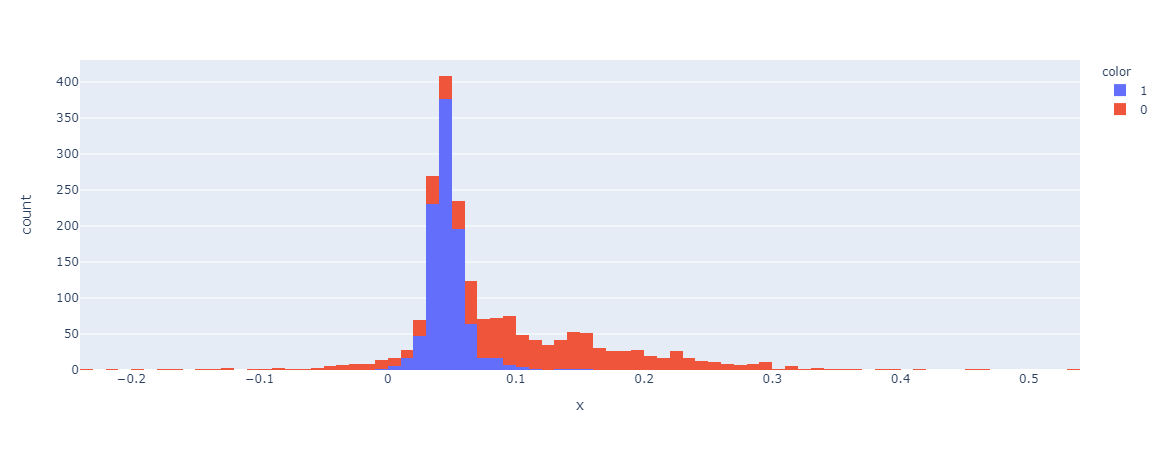

In [68]:
all_socres = []
all_labels = []
gene = 'grk2' 
gene_corr = genes_corr[gene]

for i in range(len(gene_corr)):
    x_gene, y_gene = gene_corr[i]
    x = data_log1p[x_gene]
    y = data_log1p[y_gene]
    corr = x.corr(y, 'spearman')

    all_socres.append(corr)
    all_labels.append(1)


gene_non_corr = genes_non_corr[gene]

for i in range(len(gene_non_corr)):
    x_gene, y_gene = gene_non_corr[i]
    x = data_log1p[x_gene]
    y = data_log1p[y_gene]
    corr = x.corr(y, 'spearman')

    all_socres.append(corr)
    all_labels.append(0)
    
all_labels = np.array(all_labels)
all_socres = np.array(all_socres)

fig_hist = px.histogram(
    x=all_socres, color=all_labels, nbins=100)
fig_hist.show()

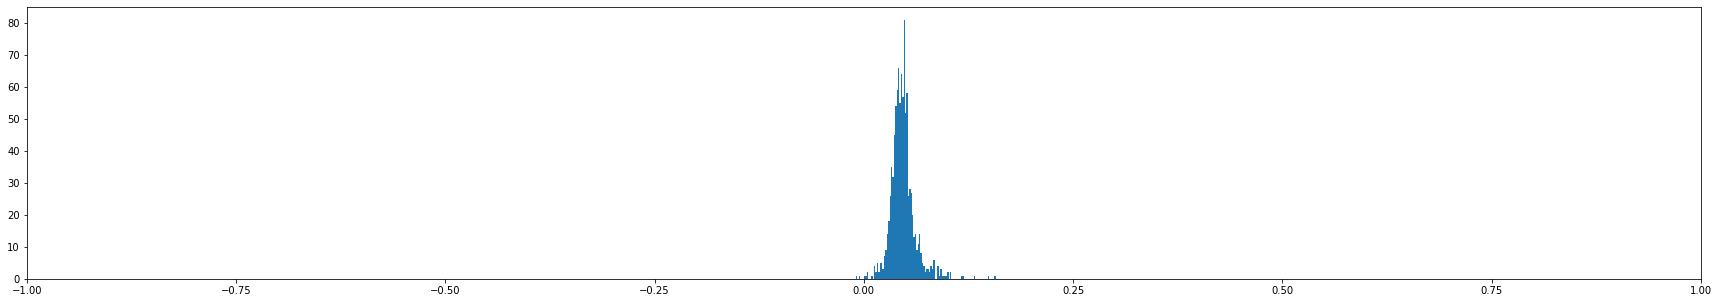

In [69]:
plt.figure(figsize=(30, 5))
plt.xlim([-1, 1])
aa = plt.hist(all_socres[all_labels==1],bins=100)

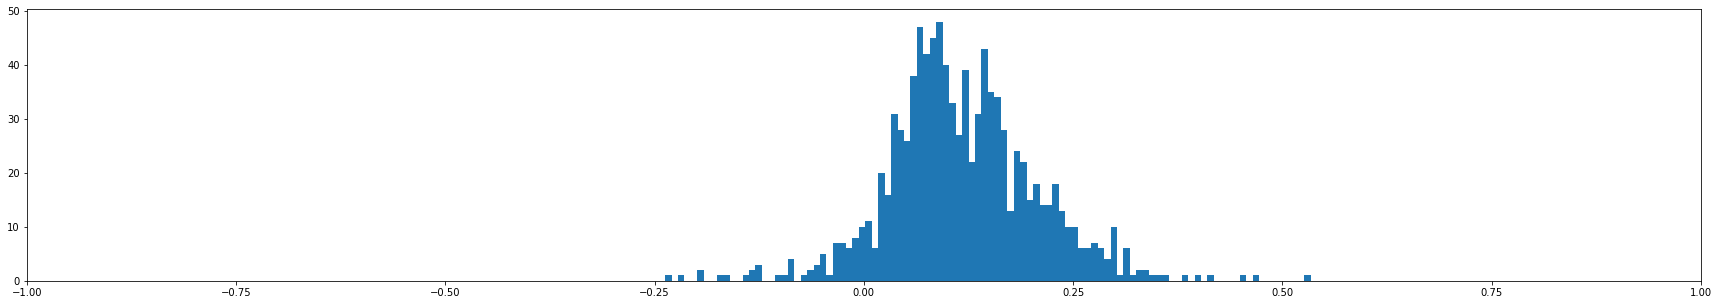

In [70]:
plt.figure(figsize=(30, 5))
plt.xlim([-1, 1])
aaa = plt.hist(all_socres[all_labels==0],bins=100)